## Extract Linear Predictive Coding (LPC) feature from sound signal

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy
import librosa

sys.path.append('../../')

from data_loader import get_dataset

load data

In [17]:
data_cfg = {
    "dataType" : "raw",
    "division" : "transient",
    "dataDimension" : None
}

In [18]:
raw_dataset = get_dataset(data_cfg)

In [19]:
print("raw_dataset shape: {}".format(raw_dataset.shape))

raw_dataset shape: (150, 80000)


In [20]:
def LPCfeature_extractor(raw_dataset):
    feature_size = 13
    data_length = raw_dataset.shape[0]   # 150
    LPC = np.zeros([data_length, feature_size])
    for i in range(data_length):
        _sound = raw_dataset[i, :]
        LPC[i, :] = librosa.lpc(_sound, feature_size)[1:]
    return LPC

In [21]:
idx = 1
sound = raw_dataset[idx,:]
LPCfeature = LPCfeature_extractor(raw_dataset)

In [22]:
root = './'
with open(root + 'data_LPC_' + data_cfg["division"] + '.txt', 'w') as f:
    np.savetxt(f, LPCfeature)

In [23]:
print(np.shape(LPCfeature))
print(str(LPCfeature[1,:]))

(150, 13)
[-4.11496555  7.40741079 -6.5517744   1.34382791  2.83408767 -2.68404167
  0.87601074 -0.51932577  1.05166245 -1.03797456  0.60348502 -0.26802921
  0.08693023]


Text(0.5, 1.0, 'LP Model Forward Prediction')

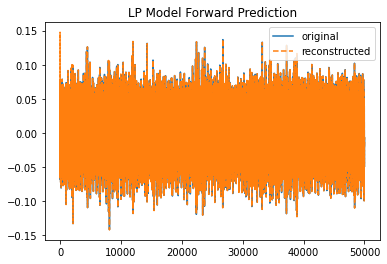

In [9]:
a = librosa.lpc(sound, 13)
b = np.hstack([[0], -1 * a[1:]])
sound_hat = scipy.signal.lfilter(b, [1], sound)
fig, ax = plt.subplots()
ax.plot(sound)
ax.plot(sound_hat, linestyle='--')
ax.legend(['original', 'reconstructed'])
ax.set_title('LP Model Forward Prediction')

In [10]:
a

array([ 1.        , -3.80969315,  6.07465554, -4.49996522,  1.02626262,
       -0.29017606,  1.46076552, -0.69573125, -1.07585702,  0.73321186,
        0.75267726, -0.95032537,  0.25868997,  0.04736062])

In [11]:
b

array([ 0.        ,  3.80969315, -6.07465554,  4.49996522, -1.02626262,
        0.29017606, -1.46076552,  0.69573125,  1.07585702, -0.73321186,
       -0.75267726,  0.95032537, -0.25868997, -0.04736062])

Text(0.5, 1.0, 'reconstructed - original')

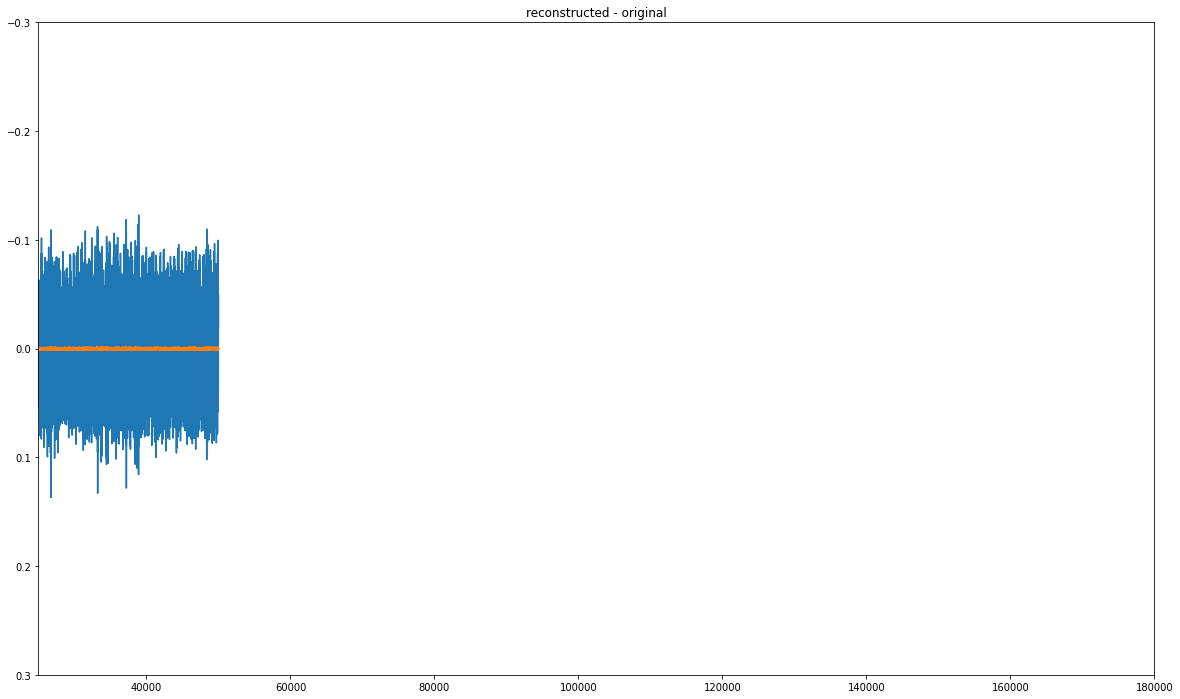

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(20,12, forward=True)
ax.plot(sound)
ax.plot(sound_hat - sound)
ax.axis([25000, 180000, 0.3, -0.3])
ax.set_title('reconstructed - original')

Text(0.5, 1.0, 'reconstructed - original')

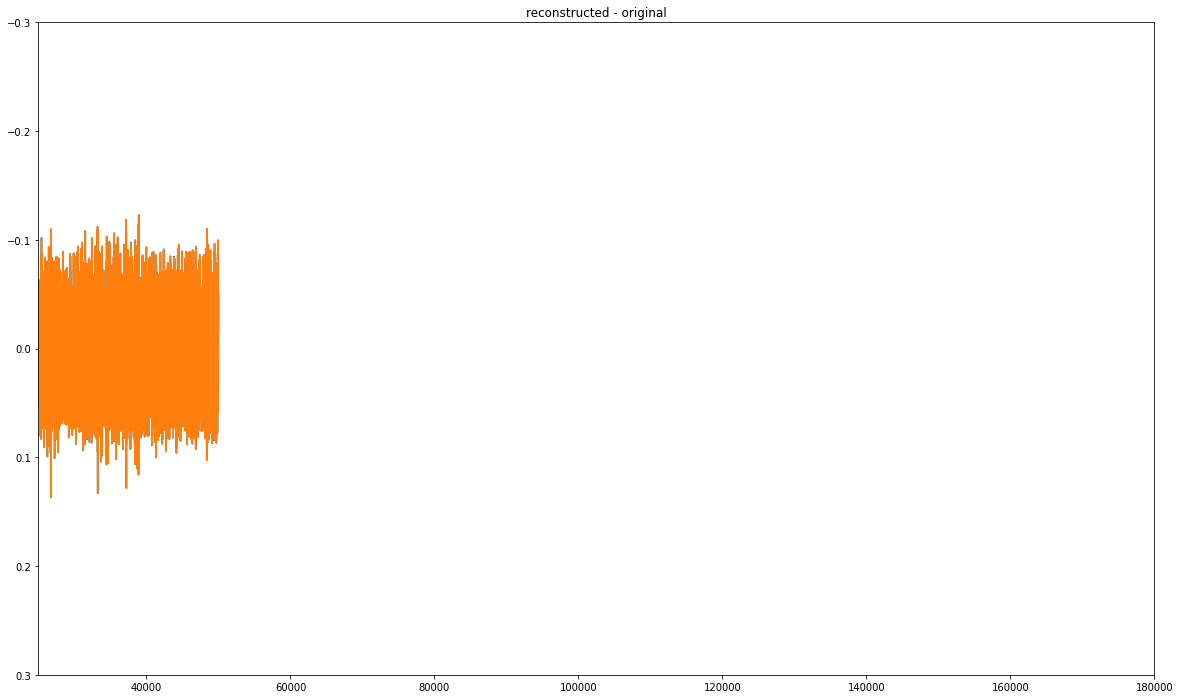

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20,12, forward=True)
ax.plot(sound)
ax.plot(sound_hat)
ax.axis([25000, 180000, 0.3, -0.3])
ax.set_title('reconstructed - original')

sample code

In [14]:
# y, sr = librosa.load(librosa.ex('trumpet'), duration=0.020)
# a = librosa.lpc(y, 2)
# b = np.hstack([[0], -1 * a[1:]])
# y_hat = scipy.signal.lfilter(b, [1], y)
# fig, ax = plt.subplots()
# ax.plot(y)
# ax.plot(y_hat, linestyle='--')
# ax.legend(['y', 'y_hat'])
# ax.set_title('LP Model Forward Prediction')